# Del 7: Uvod v strojno učenje - Osnove

Pripravimo datasete:

In [78]:
!tar -xJf data/data_del_07.tar.xz -C ./data/

In [79]:
import pandas as pd
import numpy as np

Viri:
- [DS/AI: The Complete Reference](https://medium.com/@rathi.ankit/data-science-the-complete-reference-series-3fb35077fc5a)

## Uvod v strojno učenje

## Introduction to K-Nearest Neighbors


### Problem definition

<img src="./images/airbnb.png">

### Introduction to the data

- host_response_rate: the response rate of the host
- host_acceptance_rate: number of requests to the host that convert to rentals
- host_listings_count: number of other listings the host has
- latitude: latitude dimension of the geographic coordinates
- longitude: longitude part of the coordinates
- city: the city the living space resides
- zipcode: the zip code the living space resides
- state: the state the living space resides
- accommodates: the number of guests the rental can accommodate
- room_type: the type of living space (Private room, Shared room or Entire home/apt
- bedrooms: number of bedrooms included in the rental
- bathrooms: number of bathrooms included in the rental
- beds: number of beds included in the rental
- price: nightly price for the rental
- cleaning_fee: additional fee used for cleaning the living space after the guest leaves
- security_deposit: refundable security deposit, in case of damages
- minimum_nights: minimum number of nights a guest can stay for the rental
- maximum_nights: maximum number of nights a guest can stay for the rental
- number_of_reviews: number of reviews that previous guests have left

In [80]:
import pandas as pd

dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [81]:
dc_listings.head(3)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD


### K-nearest neighbors

<img src="./images/knn_infographic.png">

### Euclidean distance

$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$

<img src="./images/euclidean_distance_five_features.png">

$d = \sqrt{(q_1 - p_1)^2}$


$d = | q_1 - p_1 |$

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li>Calculate the Euclidean distance between our living space, which can accommodate 3 people, and the first living space in the dc_listings Dataframe.</li>
<li>Assign the result to first_distance and display the value using the print function.</li>
</div>


In [82]:
import numpy as np

our_acc_value = 3

In [83]:
first_living_space_value = dc_listings.loc[0]['accommodates']

In [84]:
first_living_space_value

4

In [85]:
first_distance = np.abs(first_living_space_value-our_acc_value)

In [86]:
first_distance

1

### Calculate distance for all observations

<img src="./images/distance_between_rows_and_ours.png">

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li>Calculate the distance between each value in the accommodates column from dc_listings and the value 3, which is the number of people our listing accommodates:</li>
<li>Use the apply method to calculate the absolute value between each value in accommodates and 3 and return a new Series containing the distance values.</li>
<li>Assign the distance values to the distance column.</li>
<li>Use the Series method value_counts and the print function to display the unique value counts for the distance column.</li>
</div>



In [87]:
import numpy as np

new_listing = 3

dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x-new_listing))

In [88]:
dc_listings['distance']

0       1
1       3
2       2
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      2
12      1
13      1
14      1
15      1
16      2
17      1
18      1
19      1
20      1
21      1
22      4
23      2
24      1
25      1
26      0
27      1
28      1
29      1
       ..
3693    2
3694    3
3695    1
3696    1
3697    0
3698    1
3699    1
3700    1
3701    1
3702    1
3703    3
3704    3
3705    2
3706    3
3707    0
3708    1
3709    1
3710    1
3711    1
3712    1
3713    2
3714    0
3715    2
3716    2
3717    4
3718    1
3719    1
3720    3
3721    1
3722    0
Name: distance, Length: 3723, dtype: int64

### Randomizing, and sorting

In [89]:
print(dc_listings[dc_listings["distance"] == 0]["accommodates"].head())

26    3
34    3
36    3
40    3
44    3
Name: accommodates, dtype: int64


<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Randomize the order of the rows in dc_listings:</li>
<li>Use the np.random.permutation() function to return a NumPy array of shuffled index values.</li>
<li>Use the Dataframe method loc[] to return a new Dataframe containing the shuffled order.</li>
<li>Assign the new Dataframe back to dc_listings.</li>
<li>After randomization, sort dc_listings by the distance column.</li>
<li>Display the first 10 values in the price column using the print function.</li>
</div>



In [90]:
dc_listings.head(1)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC,1


In [91]:
import numpy as np

np.random.seed(1)

dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings=dc_listings.sort_values('distance')

In [93]:
print(dc_listings.iloc[0:10]['price'])

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


In [94]:
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
577,98%,52%,49,3,Private room,1.0,1.0,2.0,$185.00,NaN,NaN,2,14,1,38.908356,-77.028146,Washington,20005,DC,0
2166,100%,89%,2,3,Entire home/apt,1.0,1.0,1.0,$180.00,NaN,$100.00,1,14,10,38.905808,-77.000012,Washington,20002,DC,0
3631,98%,52%,49,3,Entire home/apt,1.0,1.0,2.0,$175.00,NaN,NaN,3,14,1,38.889065,-76.993576,Washington,20003,DC,0
71,100%,94%,1,3,Entire home/apt,1.0,1.0,1.0,$128.00,$40.00,NaN,1,1125,9,38.879960,-77.006491,Washington,20003,DC,0
1011,NaN,NaN,1,3,Entire home/apt,0.0,1.0,1.0,$115.00,NaN,NaN,1,1125,0,38.907382,-77.035075,Washington,20005,DC,0


### Average price

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Remove the commas (,) and dollar sign characters ($) from the price column:</li>
<li> Use the str accessor so we can apply string methods to each value in the column followed by the string method replace to replace all comma characters with the empty character: </li><li>stripped_commas = dc_listings['price'].str.replace(',', '')</li>
<li> Repeat to remove the dollar sign characters as well.</li>
<li> Convert the new Series object containing the cleaned values to the float datatype and assign back to the price column in dc_listings.</li>
<li> Calculate the mean of the first 5 values in the price column and assign to mean_price.</li>
<li> Use the print function or the variable inspector below to display mean_price.</li>
</div>

In [95]:
dc_listings['price']=dc_listings['price'].astype('str')

In [96]:
stripped_commas =  dc_listings['price'].str.replace(',', '')

In [97]:
stripped_dollar_sign = stripped_commas.str.replace('$','')

In [98]:
dc_listings['price'] =stripped_dollar_sign.astype('float')

In [99]:
dc_listings['price']

577      185.0
2166     180.0
3631     175.0
71       128.0
1011     115.0
380      219.0
943      125.0
3107     250.0
1499      94.0
625      150.0
1309      70.0
1252     125.0
1744     110.0
2334     125.0
749       40.0
1141     135.0
1855     100.0
1823      76.0
1040     299.0
1791      95.0
2055     220.0
2622     120.0
334      189.0
2528      89.0
963      119.0
2282      93.0
976       95.0
306      309.0
492      115.0
176      119.0
         ...  
1885      99.0
1326     375.0
1878      99.0
1656     283.0
3305    2000.0
1879      99.0
2995     595.0
542      340.0
1875      99.0
529      600.0
571      720.0
3524     295.0
562      599.0
1403     599.0
1658     283.0
685      399.0
2106     499.0
2688     749.0
1850     180.0
2757     245.0
1806     330.0
657      500.0
1594    1250.0
611     1250.0
2560      60.0
1596     299.0
1818      10.0
1402    1200.0
763     1000.0
1224     499.0
Name: price, Length: 3723, dtype: float64

In [100]:
mean_price = dc_listings.iloc[0:5]['price'].mean()

In [101]:
mean_price

156.6

### Function to make predictions

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li>Write a function named predict_price that can use the k-nearest neighbors machine learning technique to calculate the suggested price for any value for accommodates. This function should:</li>
<li>Take in a single parameter, new_listing, that describes the number of bedrooms.</li>
<li>We've added code that assigns dc_listings to a new Dataframe named temp_df. We used the pandas.DataFrame.copy() method so the underlying dataframe is assigned to temp_df, instead of just a reference to dc_listings.</li>
<li>Calculate the distance between each value in the accommodates column and the new_listing value that was passed in. Assign the resulting Series object to the distance column in temp_df.</li>
<li>Sort temp_df by the distance column and select the first 5 values in the price column. Don't randomize the ordering of temp_df.</li>
<li>Calculate the mean of these 5 values and use that as the return value for the entire predict_price function.</li>
<li>Use the predict_price function to suggest a price for a living space that:</li>
<li>accommodates 1 person, assign the suggested price to acc_one.</li>
<li>accommodates 2 people, assign the suggested price to acc_two.</li>
<li>accommodates 4 people, assign the suggested price to acc_four.</li>
</div>




In [102]:
np.random.seed(1)

# Brought along the changes we made to the `dc_listings` Dataframe.
dc_listings = pd.read_csv('data/dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

In [112]:
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = (temp_df['accommodates']-new_listing).abs()
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()
    return(predicted_price)

In [113]:
acc_one = predict_price(1)

In [114]:
acc_one

68.0

In [115]:
acc_two = predict_price(2)

In [116]:
acc_two

112.8

In [117]:
acc_four = predict_price(4)

In [118]:
acc_four

124.8

## Evaluating Model Performance

### Testing quality of predictions

<img src="./images/train_test_split.png">

In [119]:
import pandas as pd
import numpy as np

dc_listings = pd.read_csv("data/dc_airbnb.csv")

In [120]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [121]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Within the predict_price function, change the Dataframe that temp_df is assigned to. Change it from dc_listings to train_df, so only the training set is used.</li>
<li>Use the Series method apply to pass all of the values in the accommodates column from test_df through the predict_price function.</li>
<li> Assign the resulting Series object to the predicted_price column in test_df.</li>
</div>



In [128]:
def predict_price(new_listing):
    np.random.seed(1)
    ## DataFrame.copy() performs a deep copy
    temp_df = train_df.copy()
    temp_df = temp_df.loc[np.random.permutation(len(temp_df))]
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

In [129]:
test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

In [130]:
test_df.head(3)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,predicted_price
2792,20%,75%,1,2,Entire home/apt,0.0,1.0,1.0,120.0,NaN,NaN,1,1125,8,38.922187,-77.032475,Washington,20009,DC,116.6
2793,100%,25%,2,3,Entire home/apt,2.0,2.0,1.0,140.0,$75.00,$150.00,2,1125,7,38.931681,-77.044739,Washington,20010,DC,126.4
2794,NaN,NaN,1,4,Entire home/apt,2.0,1.0,1.0,299.0,NaN,NaN,2,1125,5,38.933765,-77.031488,Washington,20010,DC,122.8


### Error Metrics

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

In [131]:
test_df['error'] = test_df['predicted_price']-test_df['price']

In [132]:
mae = test_df['error'].abs().mean()

In [133]:
mae

58.77013963480097

###  Mean Squared Error

$MSE = \frac{1}{n} \sum_{k=1}^{n} (actual_1 - predicted_1)^{2} + \cdots + (actual_n - predicted_n)^{2}$

In [135]:
test_df['squared_error'] = (test_df['predicted_price']-test_df['price'])**2

In [136]:
mse = test_df['squared_error'].abs().mean()

In [137]:
mse

19458.025306122436

### Training another model

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Modify the predict_price function to the right to use the bathrooms column instead of the accommodates column to make predictions.</li>
<li> Apply the function to test_df and assign the resulting Series object containing the predicted price values to the predicted_price column in test_df.</li>
<li>Calculate the squared error between the price and predicted_price columns in test_df and assign the resulting Series object to the squared_error column in test_df.</li>
<li> Calculate the mean of the squared_error column in test_df and assign to mse.</li>
<li> Use the print function or the variables inspector to display the MSE value.</li>
</div>




In [139]:
train_df = dc_listings.iloc[0:2792].copy()
test_df = dc_listings.iloc[2792:].copy()

In [145]:
def predict_price(new_listing):
    temp_df = train_df.copy()
    np.random.seed(1)
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.loc[np.random.permutation(len(temp_df))]
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

In [146]:
test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price)

In [147]:
test_df['squared_error'] = (test_df['predicted_price']-test_df['price'])**2

In [148]:
mse = test_df['squared_error'].mean()

In [149]:
mse

16608.31798066611

### Root Mean Squared Error

$RMSE = \sqrt{MSE}$

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Calculate the RMSE value of the model we trained using the bathrooms column and assign it to rmse.</li>
</div>



In [150]:
rmse = mse**0.5

In [151]:
rmse

128.87326324985378

### Comparing MAE and RMSE

$MAE = \frac{1}{n} \sum_{k=1}^{n} \lvert (actual_1 - predicted_1) \rvert + \cdots + \lvert (actual_n - predicted_n) \rvert$

$RMSE = \sqrt { \frac{ \sum_{k=1}^{n} (actual_1 - predicted_1)^2 + \cdots + (actual_n - predicted_n)^2 } {n} }$

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Calculate the MAE for errors_one and assign to mae_one.</li>
<li> Calculate the RMSE for errors_one and assign to rmse_one.</li>
<li> Calculate the MAE for errors_two and assign to mae_two.</li>
<li>Calculate the RMSE for errors_two and assign to rmse_two.</li>
</div>




In [152]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])

In [153]:
mae_one = errors_one.mean()

In [154]:
rmse_one = (errors_one**2).mean()**(1/2)

In [155]:
mae_one

7.5

In [156]:
rmse_one

7.905694150420948

In [157]:
mae_two = errors_two.sum()/len(errors_two)

In [159]:
rmse_two = np.sqrt((errors_two**2).sum()/len(errors_two))

In [160]:
mae_two

62.5

In [161]:
rmse_two

235.82302686548658

## Evaluating Model Performance

In [162]:
import pandas as pd
import numpy as np

np.random.seed(1)

In [163]:
dc_listings = pd.read_csv('data/dc_airbnb.csv')

In [164]:
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [165]:
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
dtypes: float64(6), int64(5), objec

### Removing features

In [166]:
dc_listings.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
574,100%,100%,1,2,Private room,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149,38.913548,-77.031981,Washington,20009,DC
1593,87%,100%,2,2,Private room,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49,38.953431,-77.030695,Washington,20011,DC


In [167]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 
                'longitude', 'zipcode', 'host_response_rate', 
                'host_acceptance_rate', 'host_listings_count']

In [169]:
dc_listings = dc_listings.drop(columns=drop_columns)

In [170]:
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
574,2,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149
1593,2,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49
3091,1,1.0,0.5,1.0,50.0,NaN,NaN,1,1125,1
420,2,1.0,1.0,1.0,209.0,$150.00,NaN,4,730,2
808,12,5.0,2.0,5.0,215.0,$135.00,$100.00,2,1825,34


In [171]:
dc_listings.isnull().sum()

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

In [174]:
dc_listings=dc_listings.drop(columns=['cleaning_fee','security_deposit'])

In [175]:
dc_listings.dropna(axis=0,inplace=True)

In [176]:
dc_listings.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

### Handling missing values

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Drop the cleaning_fee and security_deposit columns from dc_listings.</li>
<li>Then, remove all rows that contain a missing value for the bedrooms, bathrooms, or beds column from dc_listings.</li>
<li>You can accomplish this by using the Dataframe method dropna() and setting the axis parameter to 0.</li>
<li>Since only the bedrooms, bathrooms, and beds columns contain any missing values, rows containing missing values in these columns will be removed.</li>
<li>Display the null value counts for the updated dc_listings Dataframe to confirm that there are no missing values left.</li>
</div>




In [ ]:
#drop_columns = ['cleaning_fee', 'security_deposit']
#dc_listings = 

In [ ]:
#dc_listings = 

In [ ]:
#dc_listings.isnull().sum()

### Normalize columns

In [177]:
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,2,1.0,1.0,1.0,125.0,1,4,149
1593,2,1.0,1.5,1.0,85.0,1,30,49
3091,1,1.0,0.5,1.0,50.0,1,1125,1
420,2,1.0,1.0,1.0,209.0,4,730,2
808,12,5.0,2.0,5.0,215.0,2,1825,34


In [178]:
dc_listings.describe()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
count,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3671.000000,3.671000e+03,3671.000000
mean,3.195587,1.209752,1.257695,1.647780,148.843639,2.235358,5.885194e+05,15.106783
std,2.004190,0.840801,0.586803,1.184549,137.550045,3.618777,3.544391e+07,29.236563
min,1.000000,0.000000,0.000000,1.000000,10.000000,1.000000,1.000000e+00,0.000000
25%,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,1.200000e+02,1.000000
50%,2.000000,1.000000,1.000000,1.000000,115.000000,2.000000,1.125000e+03,4.000000
75%,4.000000,1.000000,1.000000,2.000000,165.000000,3.000000,1.125000e+03,16.000000
max,16.000000,10.000000,8.000000,16.000000,2822.000000,180.000000,2.147484e+09,362.000000



$x=\frac{x-\mu}{\sigma}.$

In [181]:
# Subtract each value in the column by the mean.
first_transform = dc_listings['maximum_nights'] - dc_listings['maximum_nights'].mean()

In [182]:
# Divide each value in the column by the standard deviation.
normalized_col = first_transform / first_transform.std()

In [183]:
normalized_col = first_transform / dc_listings['maximum_nights'].std()

In [184]:
normalized_listings = (dc_listings-dc_listings.mean())/(dc_listings.std())

In [185]:
normalized_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,-0.173345,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,-0.464148,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,-0.718601,-0.341375,-0.016573,-0.482505
420,-0.596544,-0.249467,-0.439151,-0.546858,0.437342,0.487635,-0.016584,-0.448301
808,4.393004,4.507903,1.264998,2.829956,0.480962,-0.065038,-0.016553,0.646219


<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Normalize all of the feature columns in dc_listings and assign the new Dataframe containing just the normalized feature columns to normalized_listings.</li>
<li>Add the price column from dc_listings to normalized_listings.</li>
<li> Display the first 3 rows in normalized_listings.</li>
</div>


In [186]:
normalized_listings = (dc_listings-dc_listings.mean())/(dc_listings.std())

In [187]:
normalized_listings['price'] = dc_listings['price']

In [188]:
normalized_listings.head(3)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
574,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1593,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
3091,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505


### Euclidean distance for multivariate case

$d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2}$

$d = \sqrt{(accommodates_1-accommodates_2)^2 + (bathrooms_1-bathrooms_2)^2 }
$

<img src="./images/distance_two_features.png">

In [189]:
from scipy.spatial import distance

In [190]:
first_listing = [-0.596544, -0.439151]
second_listing = [-0.596544, 0.412923]
dist = distance.euclidean(first_listing, second_listing)

In [191]:
dist

0.852074

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Calculate the Euclidean distance using only the accommodates and bathrooms features between the first row and fifth row in normalized_listings using the distance.euclidean() function.</li>
<li>  Assign the distance value to first_fifth_distance and display using the print function.</li>
</div>



In [192]:
first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]

In [193]:
first_listing

accommodates   -0.596544
bathrooms      -0.439151
Name: 574, dtype: float64

In [195]:
fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]

In [196]:
fifth_listing

accommodates    4.393004
bathrooms       1.264998
Name: 808, dtype: float64

In [197]:
first_fifth_distance = distance.euclidean(first_listing,fifth_listing)

In [198]:
first_fifth_distance

5.272543124668404

### Introduction to scikit-learn

In [200]:
from sklearn.neighbors import KNeighborsRegressor

In [201]:
knn=KNeighborsRegressor(alghoritm='brute')

###  Fitting a model and making predictions

In [202]:
# Split full dataset into train and test sets.
train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

In [203]:
# Matrix-like object, containing just the 2 columns of interest from training set.
train_features = train_df[['accommodates', 'bathrooms']]

In [204]:
# List-like object, containing just the target column, `price`.
train_target = train_df['price']

In [205]:
# Pass everything into the fit method.
knn.fit(train_features,train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [207]:
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])

In [208]:
predictions[:5]

array([103. , 307.4, 110.6, 103. , 103. ])

In [210]:
test_df['price'][0:5].values

array([105., 309.,  55., 180., 130.])

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Create an instance of the KNeighborsRegressor class with the following parameters:</li>
<li> n_neighbors: 5</li>
<li> algorithm: brute</li>
<li> Use the fit method to specify the data we want the k-nearest neighbor model to use. Use the following parameters:</li>
<li> training data, feature columns: just the accommodates and bathrooms columns, in that order, from train_df.</li>
<li> training data, target column: the price column from train_df.</li>
<li> Call the predict method to make predictions on:</li>
<li>  the accommodates and bathrooms columns from test_df</li>
<li> assign the resulting NumPy array of predicted price values to predictions.</li>
</div>



In [214]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates', 'bathrooms']

In [218]:
# Instantiate ML model.
knn=KNeighborsRegressor(algorithm='brute')

In [219]:
train_feature = train_df[train_columns]
train_target = train_df['price']

# Fit model to data.
knn.fit(train_feature,train_target)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [220]:
# Use model to make predictions.
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])

In [221]:
predictions[:5]

array([ 80.8, 279.4,  97. ,  80.8,  80.8])

In [222]:
test_df['price'][0:5].values

array([105., 309.,  55., 180., 130.])

### Calculating MSE using Scikit-Learn

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Use the mean_squared_error function to calculate the MSE value for the predictions we made in the previous screen</li>
<li> Assign the MSE value to two_features_mse</li>
<li> Calculate the RMSE value by taking the square root of the MSE value and assign to two_features_rmse</li>
<li> Display both of these error scores using the print function.</li>
</div>



In [223]:
from sklearn.metrics import mean_squared_error

train_columns = ['accommodates', 'bathrooms']
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute', metric='euclidean')

knn.fit(train_df[train_columns], train_df['price'])

predictions = knn.predict(test_df[train_columns])

In [225]:
two_features_mse = ((predictions-test_df['price'])**2).mean()

In [226]:
two_features_mse

15184.425164960207

In [227]:
two_features_rmse = (((predictions-test_df['price'])**2)**0.5).mean()

In [228]:
two_features_rmse

60.61547212741742

### Using more features


<div>
<table>
<tbody><tr>
<th>feature(s)</th>
<th>MSE</th>
<th>RMSE</th>
</tr>
<tr>
<td>accommodates</td>
<td>18646.5</td>
<td>136.6</td>
</tr>
<tr>
<td>bathrooms</td>
<td>17333.4</td>
<td>131.7</td>
</tr>
<tr>
<td>accommodates, bathrooms</td>
<td>15660.4</td>
<td>125.1</td>
</tr>
</tbody></table>


In [229]:
features = ['accommodates', 'bedrooms', 
            'bathrooms', 'number_of_reviews']

In [230]:
from sklearn.neighbors import KNeighborsRegressor

In [231]:
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

In [232]:
knn.fit(train_df[features], train_df['price'])

predictions = knn.predict(test_df[features])

In [233]:
four_mse = ((predictions-test_df['price'])**2).mean()

In [234]:
four_mse

14044.065665529013

In [235]:
four_rmse = (((predictions-test_df['price'])**2)**0.5).mean()

In [236]:
four_rmse

59.06871444823673

### Using all features


<table>
<tbody><tr>
<th>feature(s)</th>
<th>MSE</th>
<th>RMSE</th>
</tr>
<tr>
<td>accommodates</td>
<td>18646.5</td>
<td>136.6</td>
</tr>
<tr>
<td>bathrooms</td>
<td>17333.4</td>
<td>131.7</td>
</tr>
<tr>
<td>accommodates, bathrooms</td>
<td>15660.4</td>
<td>125.1</td>
</tr>
<tr>
<td>accommodates, bathrooms, bedrooms, number_of_reviews</td>
<td>13320.2</td>
<td>115.4</td>
</tr>
</tbody></table>
</div>


<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li>  Use all of the columns, except for the price column, to train a k-nearest neighbors model using the same parameters for the KNeighborsRegressor class as the ones from the last few screens.</li>
<li>  Use the model to make predictions on the test set and assign the resulting NumPy array of predictions to all_features_predictions.
<li>  Calculate the MSE and RMSE values and assign to all_features_mse and all_features_rmse accordingly.</li>
<li>  Use the print function to display both error scores.</li>
</div>



In [237]:
features =train_df.columns.tolist()

In [238]:
features

['accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [239]:
features.remove('price')

In [241]:
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute', metric='euclidean')

knn.fit(train_df[features],train_df['price'])

all_features_predictions = knn.predict(test_df[features])

In [242]:
all_features_mse = mean_squared_error(test_df['price'], all_features_predictions)

In [243]:
all_features_mse

15392.625392491465

In [244]:
all_features_rmse = all_features_mse ** (1/2)

In [245]:
all_features_rmse

124.06701976146387

## Hyperparameter Optimization

In [246]:
import pandas as pd

In [247]:
train_df = pd.read_csv('data/dc_airbnb_train.csv') 

In [248]:
test_df = pd.read_csv('data/dc_airbnb_test.csv')

In [249]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [265]:
hyper_params = list(range(1,10))

In [266]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [267]:
mse_values = list()

In [268]:
for i in hyper_params:
    knn=KNeighborsRegressor(n_neighbors=i, algorithm='brute', metric='euclidean')

    knn.fit(train_df[features],train_df['price'])

    all_features_predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], all_features_predictions)
    mse_values.append(mse)

In [269]:
mse_values

[26383.244596131968,
 15152.84755403868,
 14668.32890911389,
 16079.745093856654,
 14233.64313993174,
 13781.359025407659,
 13932.903995727982,
 14015.416293373151,
 14040.643997808958]

### Expanding grid search

In [272]:
hyper_params = list(range(1,21))
mse_values = list()
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [273]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

In [274]:
mse_values

[26383.244596131968,
 15152.84755403868,
 14668.32890911389,
 16079.745093856654,
 14233.64313993174,
 13781.359025407659,
 13932.903995727982,
 14015.416293373151,
 14040.643997808958,
 14214.452400455062,
 14323.282373847065,
 14588.854711793701,
 14576.310270546817,
 14573.683493533936,
 14642.491240045507,
 14687.59449214306,
 14719.012451236267,
 14725.675413278275,
 14780.722616672812,
 14755.384158134244]

### Visualizing hyperparameter values

<div class="alert alert-block alert-info">
<b>Vaja: </b> 
<li> Use the scatter() method from matplotlib.pyplot to generate a line plot with:</li>
<li> hyper_params on the x-axis,</li>
<li> mse_values on the y-axis.</li>
<li> Use plt.show() to display the line plot.</li>
</div>


In [275]:
import matplotlib.pyplot as plt

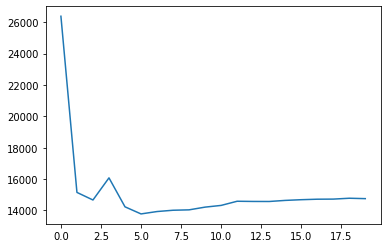

In [276]:
plt.figure()
plt.plot(mse_values)
plt.show()

### Varying features and hyperparameters

In [277]:
hyper_params = [x for x in range(1,21)]
mse_values = list()

In [278]:
features = train_df.columns.tolist()
features.remove('price')

In [279]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

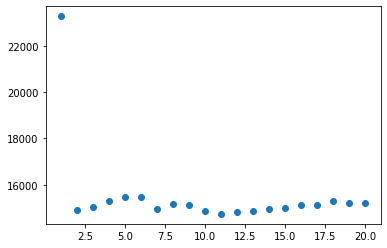

In [280]:
plt.scatter(x=hyper_params, y=mse_values)
plt.show()

### Practice the workflow

In [281]:
two_features = ['accommodates', 'bathrooms']

In [282]:
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

In [283]:
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)

In [284]:
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

In [285]:
for k,mse in enumerate(two_mse_values):
    if mse<two_lowest_mse:
        two_lowest_mse=mse
        two_lowest_k=k+1

In [286]:
two_hyp_mse[two_lowest_k]=two_lowest_mse

In [287]:
two_hyp_mse

{5: 14875.319590443689}

In [ ]:
three_features = ['accommodates', 'bathrooms', 'bedrooms']

In [ ]:
for hp in hyper_params:
    knn = KNeighborsRegressor()
    knn.fit()
    predictions = 
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)

In [ ]:
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

In [ ]:
three_hyp_mse[three_lowest_k] = three_lowest_mse

In [ ]:
three_hyp_mse

## Cross Validation


<img src="images/holdout_validation.png">

In [ ]:
import numpy as np
import pandas as pd

dc_listings = pd.read_csv("data/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

In [ ]:
shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

In [ ]:
split_one = dc_listings.iloc[0:1862].copy()
split_two = dc_listings.iloc[1862:].copy()

### Holdout Validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

In [ ]:
# First half
model = KNeighborsRegressor()
model.fit(train_one[['accommodates']], train_one['price'])
test_one["predicted_price"] = model.predict(test_one[['accommodates']])
iteration_one_rmse = mean_squared_error(test_one['price'], test_one["predicted_price"])**(1/2)

In [ ]:
iteration_one_rmse

In [ ]:
# Second half
model = KNeighborsRegressor()
model.fit()
test_two["predicted_price"] = 
iteration_two_rmse = mean_squared_error

In [ ]:
iteration_two_rmse

In [ ]:
avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])

In [ ]:
avg_rmse

### K-Fold Cross Validation


<img src="images/kfold_cross_validation.png">


In [ ]:
dc_listings.loc[dc_listings.index[0:745], 'fold'] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

In [ ]:
dc_listings['fold'].value_counts()

In [ ]:
dc_listings['fold'].isnull().sum()

### First iteration

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Training
train_iteration_one = dc_listings[dc_listings['fold'] != 1].copy()
test_iteration_one = dc_listings[dc_listings['fold'] == 1].copy()
model = KNeighborsRegressor()
model.fit(train_iteration_one[['accommodates']], train_iteration_one['price'])

# Predicting
labels = model.predict(test_iteration_one[['accommodates']])
test_iteration_one["predicted_price"] = labels
iteration_one_rmse = mean_squared_error(test_iteration_one['price'], test_iteration_one["predicted_price"])**(1/2)

In [ ]:
iteration_one_rmse

### Function for training models

In [ ]:
# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]

In [ ]:
def train_and_validate(df, folds):
    fold_rmses = []
    for fold in fold_ids:
        

In [ ]:
rmses = train_and_validate(dc_listings, fold_ids)

In [ ]:
rmses

In [ ]:
avg_rmse = np.mean(rmses)

In [ ]:
avg_rmse

###  Performing K-Fold Cross Validation Using Scikit-Learn

In [ ]:
from sklearn.model_selection import KFold

    kf = KFold(n_splits, shuffle=False, random_state=None)

In [ ]:
from sklearn.model_selection import cross_val_score

    cross_val_score(estimator, X, Y, scoring=None, cv=None)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
rmses = np.sqrt(np.absolute(mses))

In [ ]:
avg_rmse = np.mean(rmses)

In [ ]:
rmses

In [ ]:
avg_rmse

###  Exploring Different K Values

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold
    model = KNeighborsRegressor()
   
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print("folds: ", str(fold), "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

###  Bias-Variance Tradeoff


<img src="images/bias_variance.png">
